In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import signal
import random

import h5py
from IPython.utils import io

In [2]:
%matplotlib notebook

In [3]:
import sys
sys.path.append('../../../../nadavp/new_trap/Tools/')
sys.path.append('../../../../nadavp/new_trap/Tools/StatFramework/')
import BeadDataFile
from discharge_tools import *

In [4]:
%reload_ext autoreload
%autoreload 2

In [6]:
bdf_discharge = load_dir(dirname='/data/new_trap/20200306/Bead1/Discharge/')

# Einstein bead for  comparison
# foldername = r'/data/new_trap/20200226/Bead1/Discharge/'
# bdf_discharge2 = load_dir(dirname=foldername)

382  files in folder
382  files loaded


In [7]:
bdf_res = load_dir(dirname='/data/new_trap/20200306/Bead1/Response/')

300  files in folder
300  files loaded


In [8]:
bdf_discharge[-1].bead_height, bdf_discharge[20].bead_height, bdf_discharge2[-1].bead_height

NameError: name 'bdf_discharge2' is not defined

<IPython.core.display.Javascript object>


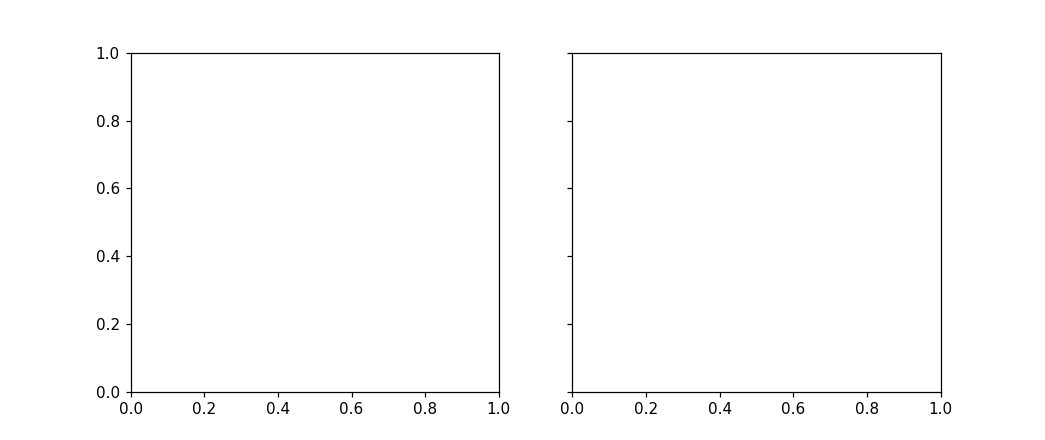

NameError: name 'data_bdfs2' is not defined

In [9]:
_,ax = plt.subplots(1,2,figsize=(9.5,4), sharex=True, sharey=True)
i = 9
[ax[0].semilogy(*bb.psd('z')) for bb in data_bdfs2[i*100:(i+1)*100:2]]
[ax[1].semilogy(*bb.psd('x')) for bb in data_bdfs2[i*100:(i+1)*100:2]]
ax[0].set(xlim=(0,100))

In [10]:
dis_z = [np.std(bb.response_at_freq2('z', drive_freq=71)) for bb in  bdf_res]
dis_x = [np.std(bb.response_at_freq2('y', drive_freq=71)) for bb in  bdf_res]

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


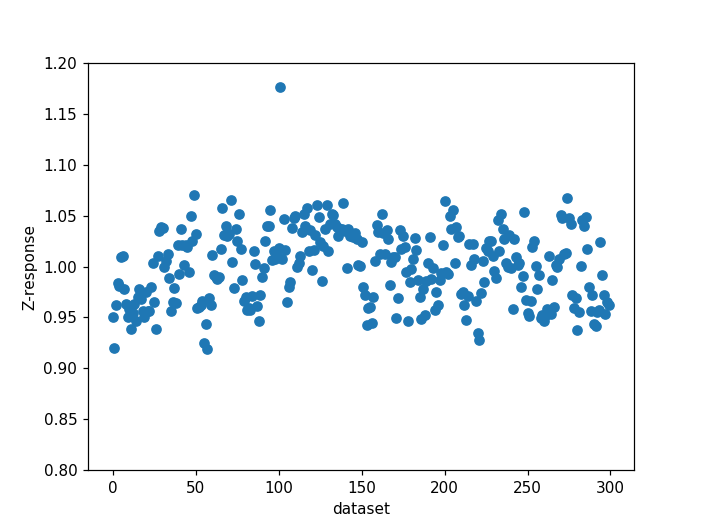

[(0.8, 1.2), Text(0, 0.5, 'Z-response'), Text(0.5, 0, 'dataset')]

In [11]:
_,ax = plt.subplots()
dis_z[101] = np.mean(dis_z)
ax.scatter(range(len(dis_x)),dis_z/np.mean(dis_z))
ax.set(ylim=(0.8,1.2), xlabel='dataset', ylabel='Z-response')

In [12]:
dis_z = [np.std(bb.response_at_freq2('z', drive_freq=71)) for bb in  bdf_discharge]
dis_y = [np.std(bb.response_at_freq2('y', drive_freq=71)) for bb in  bdf_discharge]
dis_x = [np.std(bb.response_at_freq2('x', drive_freq=71)) for bb in  bdf_discharge]

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


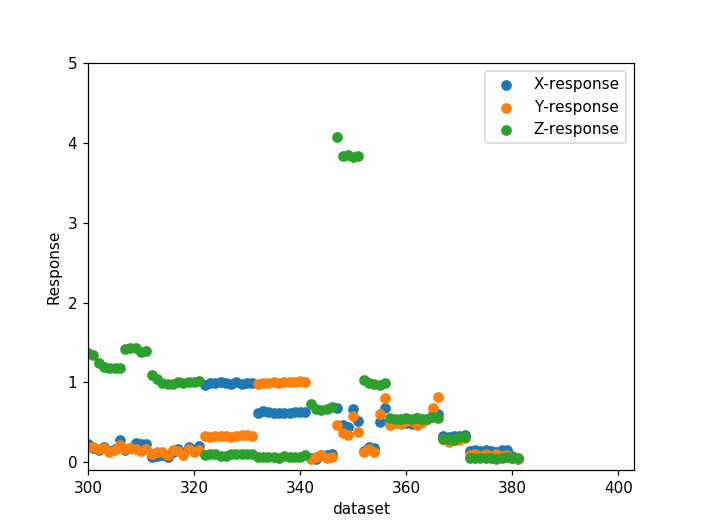

In [13]:
_,ax = plt.subplots()
ax.scatter(range(len(dis_x)),dis_x/dis_x[325], label='X-response')
ax.scatter(range(len(dis_x)),dis_y/dis_y[335], label='Y-response')
ax.scatter(range(len(dis_x)),dis_z/dis_z[320], label='Z-response')
ax.set(xlabel='dataset', ylabel='Response', ylim=(-0.1,5), xlim=(300,None))
ax.legend()

In [14]:
bdf_z = bdf_discharge[314:322]
bdf_x = bdf_discharge[322:332]
bdf_y = bdf_discharge[332:342]

### Force sensitivity

In [33]:
freq = bdf_z[0].psd2('z')[0]
z_scale = bdf_z[0].psd2('z')[1][freq==71]
# for bb in bdf_z:
#     z_scale += bb.psd2('z')[1][freq==71]
# z_scale /= len(bdf_z)

freq = bdf_x[0].psd2('x')[0]
x_scale = bdf_x[0].psd2('x')[1][freq==71]
# for bb in bdf_x:
#     x_scale += bb.psd2('x')[1][freq==71]
# x_scale /= len(bdf_x)

freq = bdf_y[0].psd2('y')[0]
y_scale = bdf_y[0].psd2('y')[1][freq==71]
# for bb in bdf_y:
#     y_scale += bb.psd2('y')[1][freq==71]
# y_scale /= len(bdf_y)

force = 4 * 1.6e-19 * 20 / 8e-3 * 0.63  # in Newtons
z_scale = force/np.sqrt(z_scale)
x_scale = force/np.sqrt(x_scale)
y_scale = force/np.sqrt(y_scale)

In [40]:
bdf_y[0].x2.shape

(50000,)

No height data
No electrodes data
No cantilever data
No height data
No electrodes data
No cantilever data


<IPython.core.display.Javascript object>


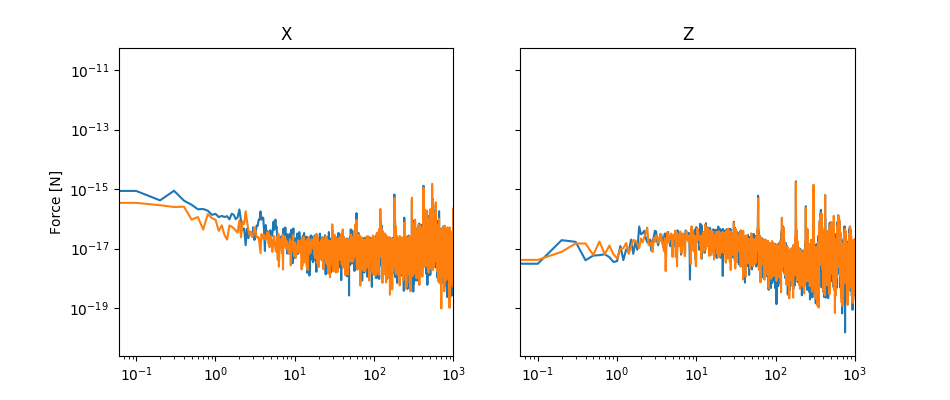

/usr/lib/python3/dist-packages/ipykernel_launcher.py:8: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:13: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  del sys.path[0]


[(0.060270250922650814, 1000), Text(0.5, 1.0, 'Z')]

In [34]:
bb = BeadDataFile.BeadDataFile(fname=r'/data/new_trap/20200306/Bead1/InitialTest/Data81.h5')
bb1 = BeadDataFile.BeadDataFile(fname=r'/data/new_trap/20200306/Bead1/InitialTest/Data84.h5')
_,ax = plt.subplots(1,2,figsize=(9.5,4),sharex=True, sharey=True)
freq, fftx = bb.psd2('x')
freq, fftx1 = bb1.psd2('x')
ax[0].loglog(freq,np.sqrt(fftx)*x_scale)
ax[0].loglog(freq,np.sqrt(fftx1)*x_scale)
ax[0].set(xlim=(0,1000), ylabel=r'Force [N]', title='X')
freq, fftz = bb.psd2('z')
freq, fftz1 = bb1.psd2('z')
ax[1].loglog(freq,np.sqrt(fftz)*z_scale)
ax[1].loglog(freq,np.sqrt(fftz1)*z_scale)
ax[1].set(xlim=(0,1000), title='Z')

### A first look at the dataset

In [59]:
# data_bdfs = load_dir(dirname=r'/data/new_trap/20200306/Bead1/Shaking/Shaking368/', file_prefix='Shaking1_')
# data_bdfs2 = load_dir(dirname=r'/data/new_trap/20200306/Bead1/Shaking/Shaking370/', file_prefix='Shaking0', max_file=1000)
data_bdfs2 = load_dir(dirname=r'/data/new_trap/20200306/Bead1/Shaking/Shaking368/', file_prefix='Shaking2', max_file=1000)

101  files in folder
101  files loaded


In [62]:
freq = data_bdfs2[0].psd2('x')[0]
fftx = np.sqrt(data_bdfs[0].psd2('x')[1])*x_scale
ffty = np.sqrt(data_bdfs[0].psd2('y')[1])*y_scale
fftz = np.sqrt(data_bdfs[0].psd2('z')[1])*z_scale
for i in range(1,101):
    if i!=527:
        fftx += np.sqrt(data_bdfs[i].psd2('x')[1])*x_scale
        fftz += np.sqrt(data_bdfs[i].psd2('z')[1])*z_scale
        ffty += np.sqrt(data_bdfs[i].psd2('y')[1])*y_scale
fftx /= 101
ffty /= 101
fftz /= 101

<IPython.core.display.Javascript object>


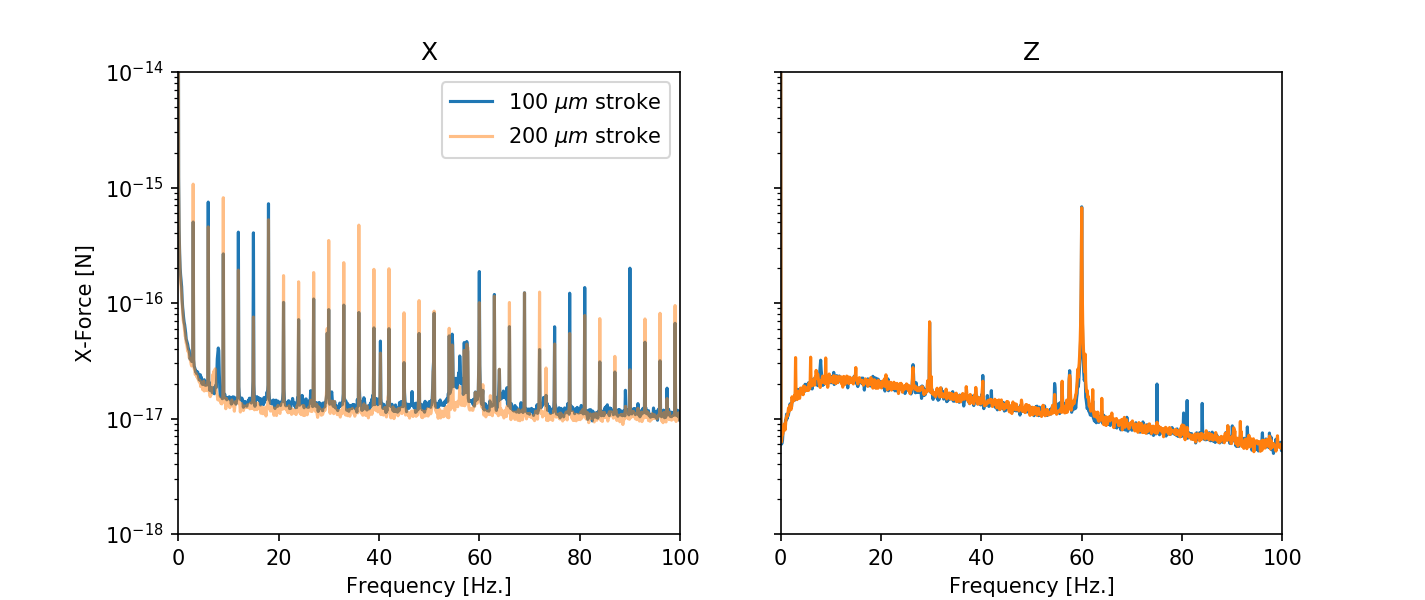

[(1e-18, 1e-14),
 (0, 100),
 Text(0.5, 0, 'Frequency [Hz.]'),
 Text(0.5, 1.0, 'Z')]

In [69]:
_,ax = plt.subplots(1,2,figsize=(9.5,4), sharey=True, sharex=True)
ax[0].semilogy(freq,fftx, label=r'100 $\mu m$ stroke')
ax[0].semilogy(freq, fftx2, alpha=0.5, label=r'200 $\mu m$ stroke')
ax[0].set(xlim=(0,100), ylabel=r'X-Force [N]', title='X', xlabel='Frequency [Hz.]')
ax[0].legend()

ax[1].semilogy(freq,fftz)
ax[1].semilogy(freq, fftz2)
ax[1].set(xlim=(0,100), ylim=(1e-18,1e-14), title='Z', xlabel='Frequency [Hz.]')

### Transfer function

In [70]:
# 7.6um German bead
# fname = r'/data/new_trap/20200306/Bead1/TransFunc/TransFunc_X_12.h5'
# tf_x = BeadDataFile.BeadDataFile(fname=fname)
# fname = r'/data/new_trap/20200306/Bead1/TransFunc/TransFunc_Y_12.h5'
# tf_y = BeadDataFile.BeadDataFile(fname=fname)
# fname = r'/data/new_trap/20200306/Bead1/TransFunc/TransFunc_Z_12.h5'
# tf_z = BeadDataFile.BeadDataFile(fname=fname)

fname = r'/home/data_transfer/data_from_windows/20200316/Bead1/TransFunc/TransFunc_X_m950k_afterspin2_recharge10_long200s.h5'
tf_x = BeadDataFile.BeadDataFile(fname=fname)
fname = r'/home/data_transfer/data_from_windows/20200316/Bead1/TransFunc/TransFunc_Y_m950k_afterspin2_long150s.h5'
tf_y = BeadDataFile.BeadDataFile(fname=fname)
fname = r'/home/data_transfer/data_from_windows/20200316/Bead1/TransFunc/TransFunc_Z_m950k_afterspin2_recharge10_long200s.h5'
tf_z = BeadDataFile.BeadDataFile(fname=fname)

tf_list = [tf_x, tf_y, tf_z]

No height data
No cantilever data
Error loading spinning data
No height data
No cantilever data
Error loading spinning data
No height data
No cantilever data
Error loading spinning data


In [ ]:
## 5um german bead

# fname = r'/data/new_trap/20200303/Bead1/TransFunc/TransFunc_X_5.h5'
# tf_x = BeadDataFile.BeadDataFile(fname=fname)
# fname = r'/data/new_trap/20200303/Bead1/TransFunc/TransFunc_Y_5.h5'
# tf_y = BeadDataFile.BeadDataFile(fname=fname)
# fname = r'/data/new_trap/20200303/Bead1/TransFunc/TransFunc_Z_5.h5'
# tf_z = BeadDataFile.BeadDataFile(fname=fname)
# tf_list = [tf_x, tf_y, tf_z]

<IPython.core.display.Javascript object>


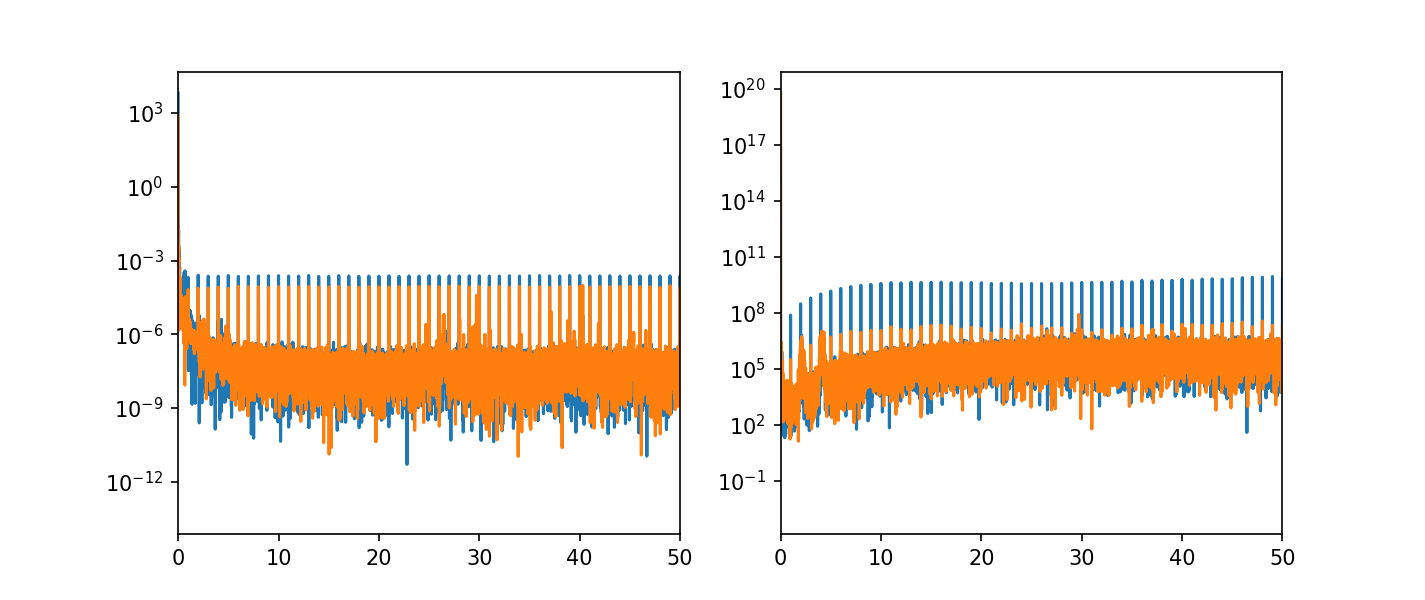

[(0, 50)]

In [71]:
_,ax = plt.subplots(1,2,figsize=(9.5,4), sharex=True)
ax[0].semilogy(*tf_x.psd2('x'))
ax[0].semilogy(*tf_y.psd2('y'))
ax[1].semilogy(*tf_z.psd2('z'))
ax[1].semilogy(*tf_x.psd2('z'))
ax[0].set(xlim=(0,50))

No height data
No cantilever data
Error loading spinning data
No height data
No cantilever data
Error loading spinning data
No height data
No cantilever data
Error loading spinning data
No height data
No cantilever data
Error loading spinning data
No height data
No cantilever data
Error loading spinning data
No height data
No cantilever data
Error loading spinning data


<IPython.core.display.Javascript object>


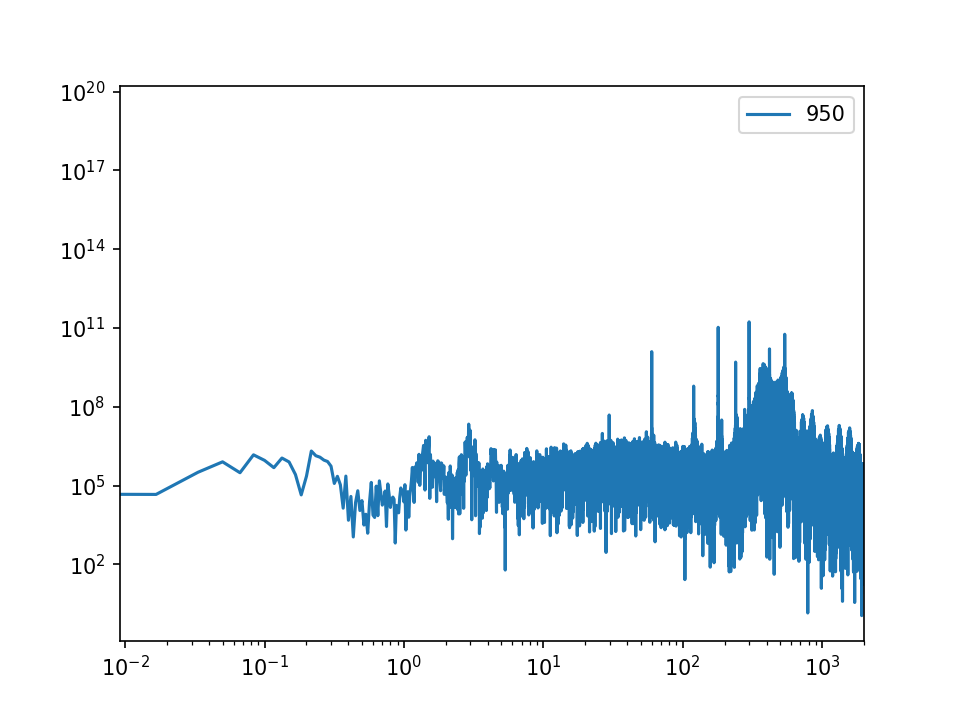

/usr/lib/python3/dist-packages/ipykernel_launcher.py:20: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


[(0.009184260356579816, 2000)]

In [62]:
fname = r'/home/data_transfer/data_from_windows/20200316/Bead1/TransFunc/TransFunc_Y_m950k_afterspin_long60s.h5'
tf_x950 = BeadDataFile.BeadDataFile(fname=fname)
fname = r'/home/data_transfer/data_from_windows/20200316/Bead1/TransFunc/TransFunc_Y_m850k_afterspin_long60s.h5'
tf_x850 = BeadDataFile.BeadDataFile(fname=fname)
fname = r'/home/data_transfer/data_from_windows/20200316/Bead1/TransFunc/TransFunc_Y_m750k_afterspin_long30s.h5'
tf_x750 = BeadDataFile.BeadDataFile(fname=fname)
fname = r'/home/data_transfer/data_from_windows/20200316/Bead1/TransFunc/TransFunc_Y_m650k_afterspin_long30s.h5'
tf_x650 = BeadDataFile.BeadDataFile(fname=fname)
fname = r'/home/data_transfer/data_from_windows/20200316/Bead1/TransFunc/TransFunc_Y_m550k_afterspin_long30s.h5'
tf_x550 = BeadDataFile.BeadDataFile(fname=fname)
fname = r'/home/data_transfer/data_from_windows/20200316/Bead1/TransFunc/TransFunc_Y_m1050k_afterspin_long60s.h5'
tf_x1050 = BeadDataFile.BeadDataFile(fname=fname)
_,ax = plt.subplots()
# ax.loglog(*tf_x1050.psd2('y'),label='1050')
ax.loglog(*tf_x950.psd2('z'),label='950')
# ax.loglog(*tf_x850.psd2('y'),label='850')
# ax.loglog(*tf_x750.psd2('y'),label='750')
# ax.loglog(*tf_x650.psd2('y'),label='650')
ax.legend()
ax.set(xlim=(0,2000))

<IPython.core.display.Javascript object>


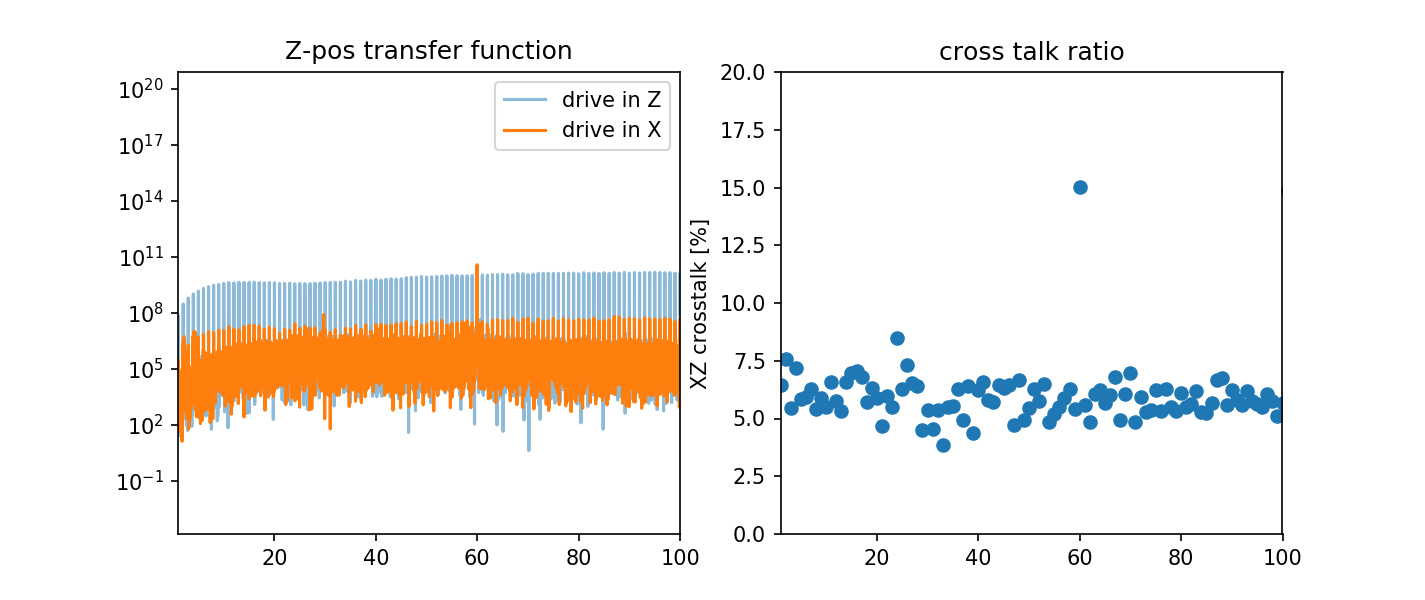

[(0, 20), Text(0, 0.5, 'XZ crosstalk [%]'), Text(0.5, 1.0, 'cross talk ratio')]

In [72]:
_,ax = plt.subplots(1,2,figsize=(9.5,4),sharex=True)
freq, psd_tx = tf_x.psd2('z')
freq, psd_tz = tf_z.psd2('z')
ax[0].semilogy(freq, psd_tz, alpha=0.5, label='drive in Z')
ax[0].semilogy(freq, psd_tx, label='drive in X')

fff = []
ratio = []
for ff,tx,tz in zip(freq,psd_tx,psd_tz):
    if ff%1==0:
        fff.append(ff)
        ratio.append(np.sqrt(tx/tz)*100)
ax[1].scatter(fff,ratio)
ax[0].set(xlim=(1,100),title='Z-pos transfer function')
ax[0].legend()
ax[1].set(ylim=(0,20), title='cross talk ratio', ylabel='XZ crosstalk [%]')

### Spin

No height data
No electrodes data
No cantilever data


<IPython.core.display.Javascript object>


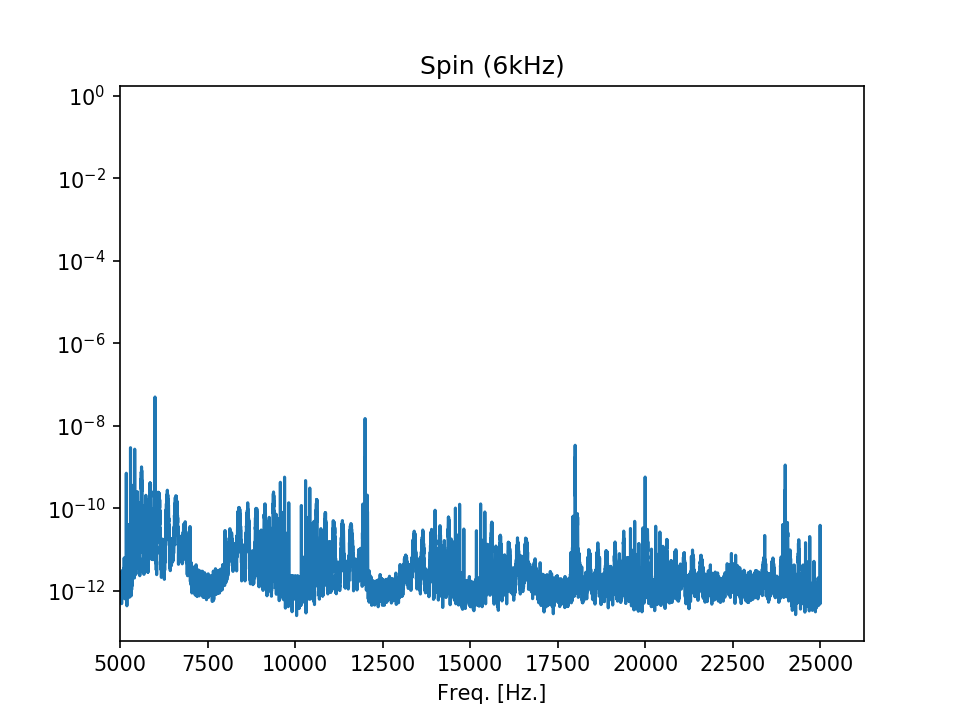

[(5000, 26250.0), Text(0.5, 0, 'Freq. [Hz.]'), Text(0.5, 1.0, 'Spin (6kHz)')]

In [48]:
bb = BeadDataFile.BeadDataFile(fname=r'/data/new_trap/20200306/Bead1/InitialTest/Data85.h5')
_,ax = plt.subplots()
ax.semilogy(*bb.welch_psd('spin',res=50000))
ax.set(xlim=(5000,None), title='Spin (6kHz)', xlabel='Freq. [Hz.]')